<a href="https://colab.research.google.com/github/jaskiratkalra26/CIFAR10-Image-Classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train = x_train / 255
x_test = x_test / 255




In [4]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(x_train,y_train,epochs = 5, validation_data = (x_test,y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2704 - loss: 2.0033 - val_accuracy: 0.3792 - val_loss: 1.7260
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3873 - loss: 1.7008 - val_accuracy: 0.4042 - val_loss: 1.6680
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4225 - loss: 1.6065 - val_accuracy: 0.4105 - val_loss: 1.6716
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4426 - loss: 1.5610 - val_accuracy: 0.4295 - val_loss: 1.5808
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4551 - loss: 1.5141 - val_accuracy: 0.4615 - val_loss: 1.5149


In [15]:
history_overfit = model.fit(x_train,y_train,epochs = 30,validation_data=(x_test,y_test))
0

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4651 - loss: 1.4805 - val_accuracy: 0.4606 - val_loss: 1.5103
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4737 - loss: 1.4593 - val_accuracy: 0.4715 - val_loss: 1.4749
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4803 - loss: 1.4382 - val_accuracy: 0.4621 - val_loss: 1.5077
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4924 - loss: 1.4157 - val_accuracy: 0.4545 - val_loss: 1.5114
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4999 - loss: 1.3973 - val_accuracy: 0.4715 - val_loss: 1.4803
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5033 - loss: 1.3793 - val_accuracy: 0.4895 - val_loss: 1.4430
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5089 - loss: 1.3640 - val_accuracy: 0.4905 - val_loss: 1.4411
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5167 - loss: 1.3441 

0

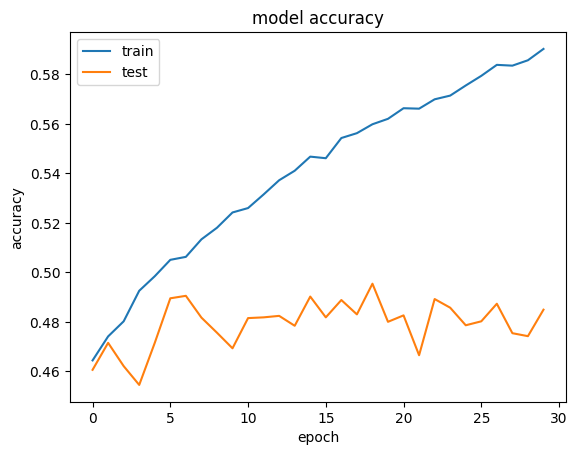

In [16]:
import matplotlib.pyplot as plt
plt.plot(history_overfit.history['accuracy'])
plt.plot(history_overfit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix

In [53]:
y_pred = model.predict(x_test)
out = []
actual = []
for i in range(len(y_pred)):
  for j in range(len(y_pred[i])):
    if y_pred[i][j] == max(y_pred[i]):
      out.append(j)
    if y_test[i][j] == 1:
      actual.append(j)




313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [54]:
cm = confusion_matrix(actual,out)
cm

array([[491,  35,  77,  39,  54,  27,  37,  20, 171,  49],
       [ 45, 635,  14,  35,  16,  27,  17,  19,  90, 102],
       [ 58,  33, 318,  95, 205,  79, 134,  48,  20,  10],
       [ 25,  28,  80, 334,  77, 184, 150,  39,  37,  46],
       [ 41,  10,  97,  69, 509,  44, 128,  60,  33,   9],
       [ 22,  16,  68, 220,  86, 377, 110,  47,  36,  18],
       [  9,  22,  53,  77, 162,  53, 580,  18,  14,  12],
       [ 54,  16,  65,  80, 123,  62,  44, 473,  28,  55],
       [ 86,  66,  27,  33,  37,  21,  17,  11, 656,  46],
       [ 38, 226,  17,  29,  24,  26,  26,  24, 114, 476]])

<Axes: >

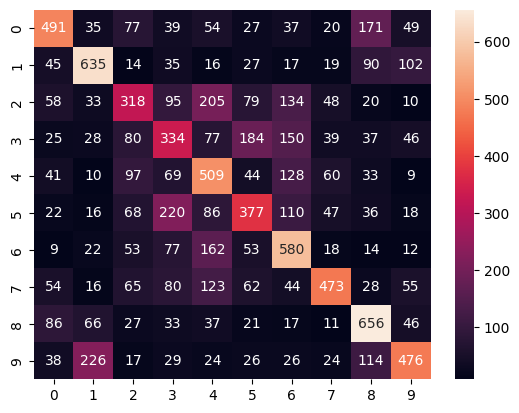

In [55]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')